<a href="https://colab.research.google.com/github/TJTomas/DSPS_TTomaszewski/blob/main/HW10/Tomaszewski_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 10
## Continuation of what was done in lab
#### Finish the notebook started in class (kerasmnist.ipynb in the Labs folder) by changing the neural network we built together into a convolutional neural network (see also slides)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [18]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [19]:
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [22]:
x_train.shape

(60000, 28, 28, 1)

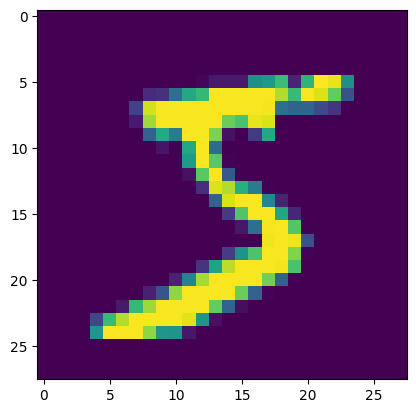

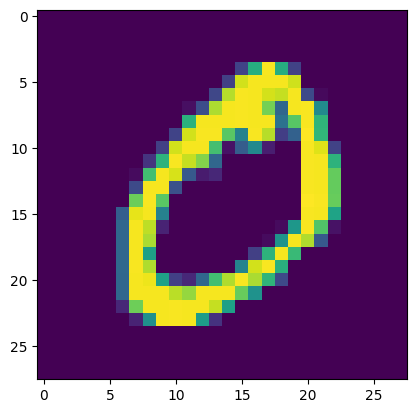

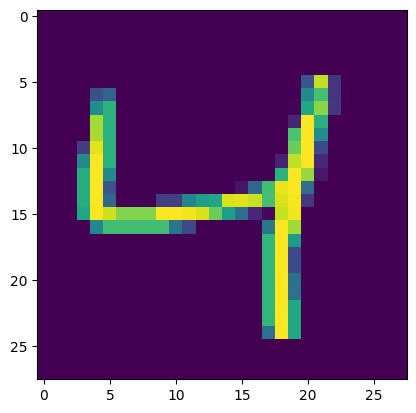

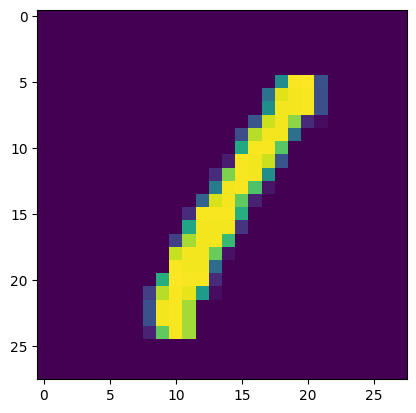

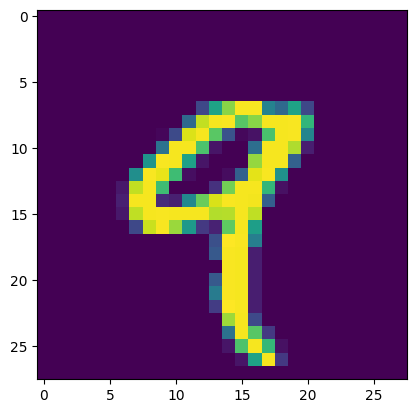

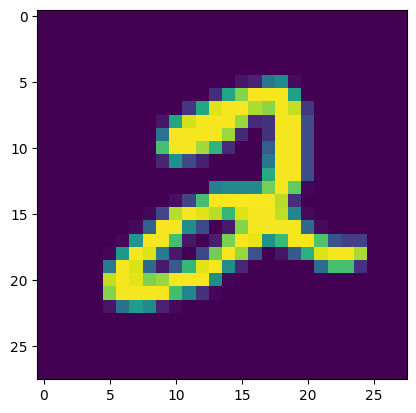

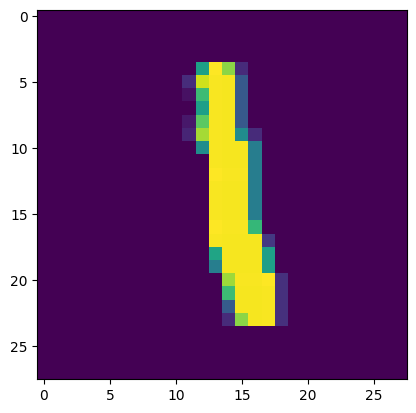

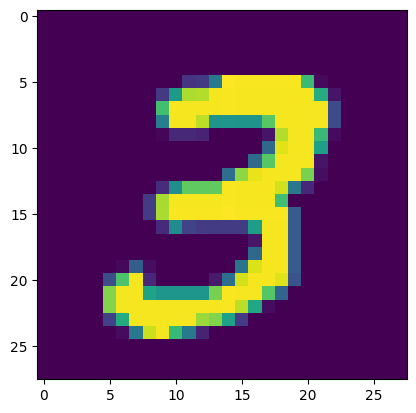

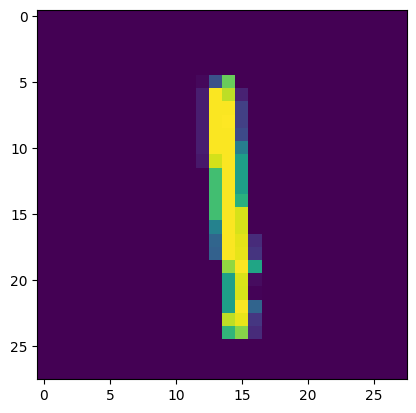

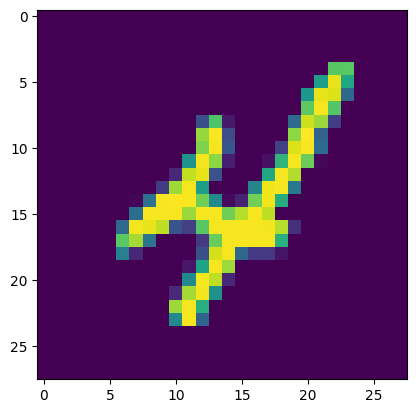

In [23]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()

In [24]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [25]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [26]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])

In [27]:
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [28]:
x_testraveled.shape

(10000, 784)

In [29]:
x_trainraveled.shape

(60000, 784)

In [30]:
# This line is redundant and can be removed or commented out after fixing mnUsLfUWPbGv
# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [31]:
mlp = keras.Sequential([
    layers.Dense(320, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax'),
])

In [32]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
history = mlp.fit(x_trainraveled, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5066 - loss: 1.7769 - val_accuracy: 0.8943 - val_loss: 0.6225
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9022 - loss: 0.5243 - val_accuracy: 0.9306 - val_loss: 0.3055
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9354 - loss: 0.2795 - val_accuracy: 0.9447 - val_loss: 0.2155
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9534 - loss: 0.1883 - val_accuracy: 0.9537 - val_loss: 0.1768
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9630 - loss: 0.1460 - val_accuracy: 0.9604 - val_loss: 0.1471
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9717 - loss: 0.1108 - val_accuracy: 0.9615 - val_loss: 0.1326
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9767 - loss: 0.0915 - val_accuracy: 0.9654 - val_loss: 0.1221
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9831 - loss: 0.0708 - val_accuracy: 0.

In [34]:
history.history

{'accuracy': [0.705133318901062,
  0.9115777611732483,
  0.9385777711868286,
  0.9544222354888916,
  0.9647777676582336,
  0.9720888733863831,
  0.9775555729866028,
  0.982355535030365,
  0.9855999946594238,
  0.9883333444595337],
 'loss': [1.3072562217712402,
  0.4413652718067169,
  0.2559795081615448,
  0.18082188069820404,
  0.13788418471813202,
  0.10811679810285568,
  0.08807725459337234,
  0.07119695842266083,
  0.05827222764492035,
  0.04826746881008148],
 'val_accuracy': [0.894266664981842,
  0.9305999875068665,
  0.9447333216667175,
  0.9536666870117188,
  0.9603999853134155,
  0.9615333080291748,
  0.965399980545044,
  0.9678666591644287,
  0.9690666794776917,
  0.9667999744415283],
 'val_loss': [0.622489869594574,
  0.3054906129837036,
  0.21551130712032318,
  0.17681872844696045,
  0.14705604314804077,
  0.1325896680355072,
  0.12206318229436874,
  0.1116165816783905,
  0.10818586498498917,
  0.11219149827957153]}

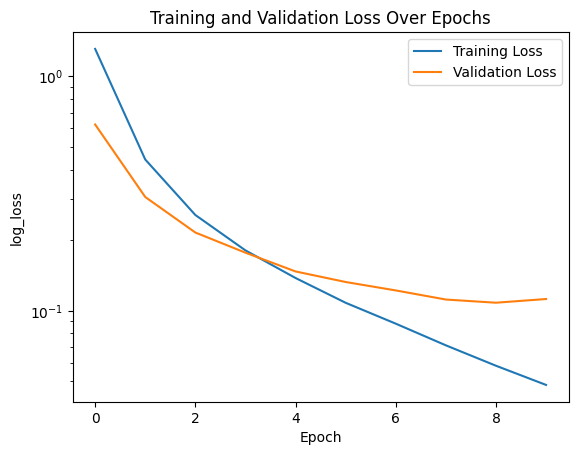

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss Over Epochs')
plt.ylabel("log_loss")
plt.legend()
plt.yscale('log')
plt.show()

# Fig 1

In [36]:
mlp.evaluate(x_testraveled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9691 - loss: 0.1118


[0.10080045461654663, 0.9717000126838684]

# Conv Matrix

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input # Import Input layer

input_shape = (28, 28, 1) # Define input_shape

model = Sequential([
    Input(shape=input_shape), # Use Input layer as the first layer
    Conv2D(32, kernel_size=(10, 10), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = model.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8006 - loss: 0.6353 - val_accuracy: 0.9673 - val_loss: 0.1092
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9711 - loss: 0.0937 - val_accuracy: 0.9721 - val_loss: 0.0898
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9812 - loss: 0.0620 - val_accuracy: 0.9812 - val_loss: 0.0607
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9851 - loss: 0.0460 - val_accuracy: 0.9835 - val_loss: 0.0560
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9882 - loss: 0.0373 - val_accuracy: 0.9850 - val_loss: 0.0504
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9909 - loss: 0.0289 - val_accuracy: 0.9865 - val_loss: 0.0474
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9913 - loss: 0.0282 - val_accuracy: 0.9877 - val_loss: 0.0454
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9924 - loss: 0.0251 - val_accuracy: 0.

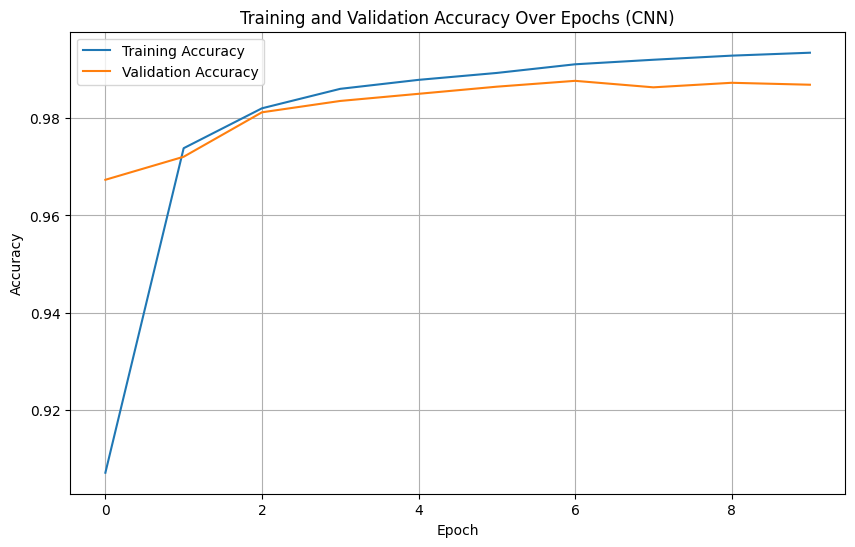

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs (CNN)')
plt.legend()
plt.grid(True)
plt.show()

# Fig 2

# Redone with dropout

In [39]:
"""
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
y_train[:10]
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
"""

'\n(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()\ny_train[:10]\nx_train = x_train.astype(float) / 255.\nx_test = x_test.astype(float) / 255.\ny_train = keras.utils.to_categorical(y_train, 10)\ny_test = keras.utils.to_categorical(y_test, 10)\nx_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])\nx_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])\n'

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input # Import Input layer

input_shape = (28, 28, 1) # Define input_shape


model2 = Sequential([
    Input(shape=input_shape), # Use Input layer as the first layer
    Conv2D(32, kernel_size=(10, 10), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming x_train and y_train are already loaded and preprocessed from earlier cells.
cnn_history2 = model2.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7272 - loss: 0.8235 - val_accuracy: 0.9686 - val_loss: 0.1040
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9558 - loss: 0.1511 - val_accuracy: 0.9779 - val_loss: 0.0707
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9717 - loss: 0.0972 - val_accuracy: 0.9813 - val_loss: 0.0596
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9783 - loss: 0.0730 - val_accuracy: 0.9831 - val_loss: 0.0571
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9819 - loss: 0.0644 - val_accuracy: 0.9855 - val_loss: 0.0496
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9829 - loss: 0.0555 - val_accuracy: 0.9871 - val_loss: 0.0460
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9863 - loss: 0.0462 - val_accuracy: 0.9868 - val_loss: 0.0444
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9870 - loss: 0.0401 - val_accuracy: 0.

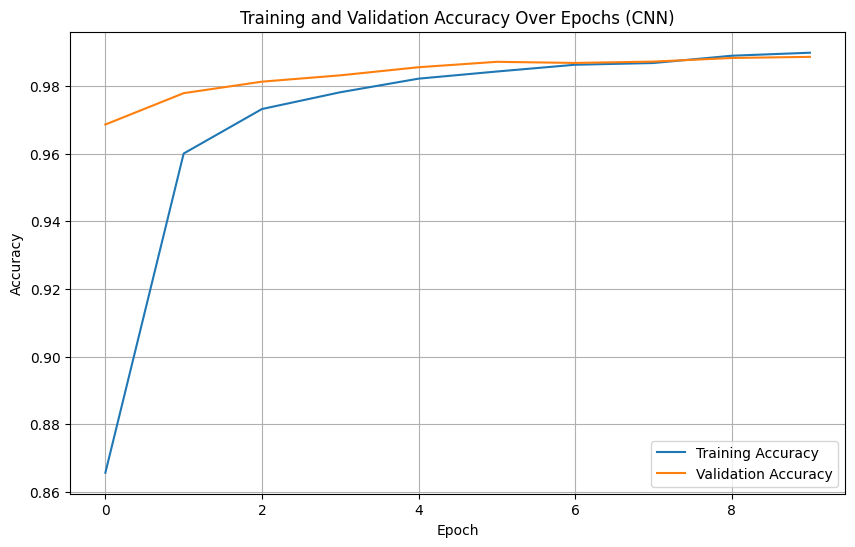

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(cnn_history2.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs (CNN)')
plt.legend()
plt.grid(True)
plt.show()

#Fig 3